# Program - Pyrecplay_lpfilterblock
PyAudio Example: Low pass filter between input and output (i.e., record a
few samples, filter them, and play them back immediately).

    - Gerald Schuller, January 2015
* **Import relevant modules**

In [1]:
%matplotlib inline
import pyaudio
import struct
import math
#import array
import numpy as np
import scipy.signal
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')


CHUNK = 1024 #Blocksize
WIDTH = 2 #2 bytes per sample
CHANNELS = 1 #2
RATE = 32000  #Sampling Rate in Hz
RECORD_SECONDS = 8

* **Design Low-pass Filter:**

In [2]:
[b,a]=scipy.signal.iirfilter(2, 500.0/16000,rp=60,btype='lowpass')

* **Plot the freqeuncy response for the filter:**

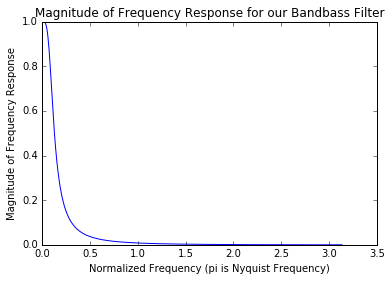

In [3]:
fig = plt.figure()
[freq, response] = scipy.signal.freqz(b,a)
plt.plot(freq, np.abs(response))
plt.xlabel('Normalized Frequency (pi is Nyquist Frequency)')
plt.ylabel("Magnitude of Frequency Response")
plt.title("Magnitude of Frequency Response for our Bandbass Filter")
fig.show()

* **Initialise audio port and start recording**

In [4]:
p = pyaudio.PyAudio()

stream = p.open(format=p.get_format_from_width(WIDTH),
                channels=CHANNELS,
                rate=RATE,
                input=True,
                output=True,
                #input_device_index=10,
                frames_per_buffer=CHUNK)


print("* recording")

* recording


* **Initialize memory for filter:**

In [5]:
z=np.zeros(3-1)

* **Loop for the blocks:**

In [6]:
for i in range(0, int(RATE / CHUNK * RECORD_SECONDS)):
    #Reading from audio input stream into data with block length "CHUNK":
    data = stream.read(CHUNK)
    #Convert from stream of bytes to a list of short integers (2 bytes here) in "samples":
    #shorts = (struct.unpack( "128h", data ))
    shorts = (struct.unpack( 'h' * CHUNK, data ));
    #samples=list(shorts);
    samples=np.array(list(shorts),dtype=float);
    #filter function:
    [filtered,z]=scipy.signal.lfilter(b, a, samples, zi=z)
    #Bypass filter:
    #filtered=samples
    filtered=np.clip(filtered, -32000,32000)
    #converting from short integers to a stream of bytes in data:
    data=struct.pack('h' * len(filtered), *filtered);
    #Writing data back to audio output stream:
    stream.write(data, CHUNK)

print("* done")

stream.stop_stream()
stream.close()

p.terminate()

* done
